# <span style="color:#336699">SER-347/CAP-419 - Introdução à Programação com Dados Geoespaciais</span>
<hr style="border:2px solid #0077b9;">

# <span style="color:#336699">Análise de Dados Geoespaciais - Python</span>
<hr style="border:2px solid #0077b9;">

# Exercício/Desafio

# Gerar um mapa com a classificação dos estados em relação ao número de focos ocorridos no mês de agosto de 2024

Exemplo:

<table>
    <tr>
        <td><img src="https://upload.wikimedia.org/wikipedia/commons/a/a5/Mapa_dos_estados_brasileiros_por_popula%C3%A7%C3%A3o_%282022%29.svg" width="300" height="300"></td>
    </tr>
</table>



<table>
    <tr>
        <td><img src="https://upload.wikimedia.org/wikipedia/commons/thumb/e/ed/Pandas_logo.svg/2560px-Pandas_logo.svg.png" alt="Python Data Analysis Library" width="300;"/></td>
        <td><img src="https://geopandas.org/en/stable/_images/geopandas_logo.png" alt="Python Geospatial Data Analysis Library" width="200"/></td>
    </tr>
</table>

## 1. Importar os pacotes

In [64]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt

## 2. Vamos abrir as shapes 'uf_2018/uf_2018.shp' e 'focos/focos.shp'

In [65]:
ufs = gpd.read_file("uf_2018/uf_2018.shp")
ufs.head()

,ID,NOME,SIGLA,GEOCODIGO,REGIAO,REGIAO_SIG,geometry
0,1,SERGIPE,SE,28,NORDESTE,NE,"MULTIPOLYGON (((-37.98248 -11.34818, -37.98253..."
1,2,MARANHÃO,MA,21,NORDESTE,NE,"MULTIPOLYGON (((-44.48155 -2.72660, -44.47867 ..."
2,3,ESPÍRITO SANTO,ES,32,SUDESTE,SE,"MULTIPOLYGON (((-29.33711 -20.48802, -29.33686..."
3,4,AMAZONAS,AM,13,NORTE,N,"POLYGON ((-69.61341 -2.44025, -69.53446 -2.000..."
4,5,RORAIMA,RR,14,NORTE,N,"POLYGON ((-63.97805 2.46754, -63.97871 2.46840..."


In [25]:
focos = gpd.read_file("focos_2024_br/focos_2024_br.shp")
focos.head()

,DataHora,Satelite,Pais,Estado,Municipio,Bioma,DiaSemChuv,Precipitac,RiscoFogo,Latitude,Longitude,FRP,geometry
0,2024/05/01 17:34:00,AQUA_M-T,Brasil,SÃO PAULO,PEREIRAS,Mata Atlântica,14.0,0.0,1.00,-23.07218,-47.99586,8.0,POINT (-47.99586 -23.07218)
1,2024/05/01 17:37:00,AQUA_M-T,Brasil,PIAUÍ,GILBUÉS,Cerrado,3.0,0.0,0.21,-9.54904,-45.35360,13.7,POINT (-45.35360 -9.54904)
2,2024/05/01 17:37:00,AQUA_M-T,Brasil,PIAUÍ,BAIXA GRANDE DO RIBEIRO,Cerrado,3.0,0.0,0.19,-8.53773,-45.05117,52.6,POINT (-45.05117 -8.53773)
3,2024/05/01 17:37:00,AQUA_M-T,Brasil,PIAUÍ,BAIXA GRANDE DO RIBEIRO,Cerrado,3.0,0.0,0.20,-8.53765,-45.04380,74.8,POINT (-45.04380 -8.53765)
4,2024/05/01 17:37:00,AQUA_M-T,Brasil,PIAUÍ,BAIXA GRANDE DO RIBEIRO,Cerrado,3.0,0.0,0.22,-8.53456,-45.03149,23.1,POINT (-45.03149 -8.53456)


## 3. Vamos criar a coluna timestamp, filtrar para Agosto e selecionar apenas algumas colunas

In [66]:
focos["timestamp"] = pd.to_datetime(focos["DataHora"])
focos_agosto = focos[focos.timestamp.dt.month == 8]
focos_agosto = focos_agosto[["timestamp", "Estado", "Municipio", "geometry"]]
focos_agosto.head()

,timestamp,Estado,Municipio,geometry
34800,2024-08-01 17:54:00,AMAZONAS,APUÍ,POINT (-59.40308 -6.72610)
34801,2024-08-01 17:54:00,AMAZONAS,APUÍ,POINT (-59.42051 -6.71668)
34802,2024-08-01 17:54:00,AMAZONAS,APUÍ,POINT (-59.40479 -6.71457)
34803,2024-08-01 17:54:00,AMAZONAS,APUÍ,POINT (-59.14380 -6.69096)
34804,2024-08-01 16:18:00,PERNAMBUCO,SANTA TEREZINHA,POINT (-37.49661 -7.41935)


## 4. Vamos agrupar os focos por UF. Dentre as diversas formas de fazer isso, vou mostrar abaixo 2 alternativas:

### 4.1. Alternativa 1. Agrupar o nosso DataFrame pandas pela coluna "Estado" para obter a contagem de focos por UF e depois mergear com o GeoDataFrame geopandas chamado 'ufs' para obter a geometria de cada UF

In [120]:
# Iremos agrupar o nosso dataframe pela coluna "Estado"
focos_agosto_por_uf = focos_agosto.groupby('Estado').Estado.count()
# Nesse momento do código, 'focos_agosto_por_uf' é um pandas.Series. Vamos criar um DataFrame com isso.
focos_agosto_por_uf_pddf = pd.DataFrame({
    'Estado': focos_agosto_por_uf.index,
    'num_focos': focos_agosto_por_uf.values
})
# Para mesclar esse pandas.DataFrame com o nosso geopandas.GeoDataFrame chamado "ufs" para obter a geometria de cada UF, vamos usar a função 
# ... merge. Só usaríamos a função 'sjoin' quando queremos computar operações espaciais (intersection/within..) entre 2 geopandas.GeoDataFrame.
num_focos_estado = ufs.merge(focos_agosto_por_uf_pddf, left_on='NOME', right_on='Estado', how='left')
num_focos_estado = num_focos_estado[["SIGLA", "geometry", "num_focos"]]
num_focos_estado = num_focos_estado.sort_values(by='num_focos', ascending=False)
num_focos_estado.head()

,SIGLA,geometry,num_focos
15,MT,"POLYGON ((-60.38233 -13.99242, -60.38206 -13.9...",14617
25,PA,"MULTIPOLYGON (((-46.31362 -0.95914, -46.31382 ...",13803
3,AM,"POLYGON ((-69.61341 -2.44025, -69.53446 -2.000...",10328
14,MS,"POLYGON ((-57.51683 -22.17363, -57.51741 -22.1...",4648
22,RO,"POLYGON ((-62.89216 -12.85884, -62.89371 -12.8...",4522


### 4.2. Alternativa 2. Juntar o nosso DataFrame pandas com o GeoDataFrame 'ufs' para termos a coluna "SIGLA", agrupar por "SIGLA" e depois mergear com o ufs por "SIGLA" pra obter a geometria do estado

**Obs.:** Essa abordagem permite que a gente faça o merge utilizando a coluna 'SIGLA', que contém valores como "SP", "RJ", etc. Esse merge é mais confiável do que mergear pela coluna "Estado" que contém nomes com acentos e símbolos.

In [122]:
# Primeiro convertemos os focos para a mesma CRS das ufs
focos_agosto_crs = focos_agosto.to_crs(ufs.crs)
# Computamos quais UFs que 'contains' os focos
focos_estados = gpd.sjoin(ufs, focos_agosto_crs, how='inner', predicate='contains')
# Agrupamos por 'SIGLA'. Para cada grupo (linha), o valor da coluna 'geometry' será o primeiro (pois a geometria de 
# ...cada grupo (UF) é a mesma. Além disso, para cada grupo, vamos contar quantos valores tem na coluna "ID".
num_focos_estado = focos_estados.groupby('SIGLA', as_index=False).agg({
   'geometry': 'first',
   'ID': 'count'
})
# Por fim, vamos somente renomear 'ID' para 'num_focos'
num_focos_estado.columns = ["SIGLA", "geometry", "num_focos"]
num_focos_estado = num_focos_estado.sort_values(by='num_focos', ascending=False)
num_focos_estado.head()

,SIGLA,geometry,num_focos
12,MT,"POLYGON ((-60.38233 -13.99242, -60.38206 -13.9...",14617
13,PA,"MULTIPOLYGON (((-46.31362 -0.95914, -46.31382 ...",13803
2,AM,"POLYGON ((-69.61341 -2.44025, -69.53446 -2.000...",10328
11,MS,"POLYGON ((-57.51683 -22.17363, -57.51741 -22.1...",4648
20,RO,"POLYGON ((-62.89216 -12.85884, -62.89371 -12.8...",4522


## 5. Agora que temos o GeoDataFrame com o número de focos por UF, vamos criar a coluna 'ranking' e ordenar nosso GeoDataFrame com base nela

In [123]:
num_focos_estado['ranking'] = num_focos_estado['num_focos'].rank(ascending=False).astype(int)
num_focos_estado = num_focos_estado.sort_values(by='ranking', ascending=True)
num_focos_estado.head()

,SIGLA,geometry,num_focos,ranking
12,MT,"POLYGON ((-60.38233 -13.99242, -60.38206 -13.9...",14617,1
13,PA,"MULTIPOLYGON (((-46.31362 -0.95914, -46.31382 ...",13803,2
2,AM,"POLYGON ((-69.61341 -2.44025, -69.53446 -2.000...",10328,3
11,MS,"POLYGON ((-57.51683 -22.17363, -57.51741 -22.1...",4648,4
20,RO,"POLYGON ((-62.89216 -12.85884, -62.89371 -12.8...",4522,5


## 6. Vamos plotar o nosso GeoDataFrame

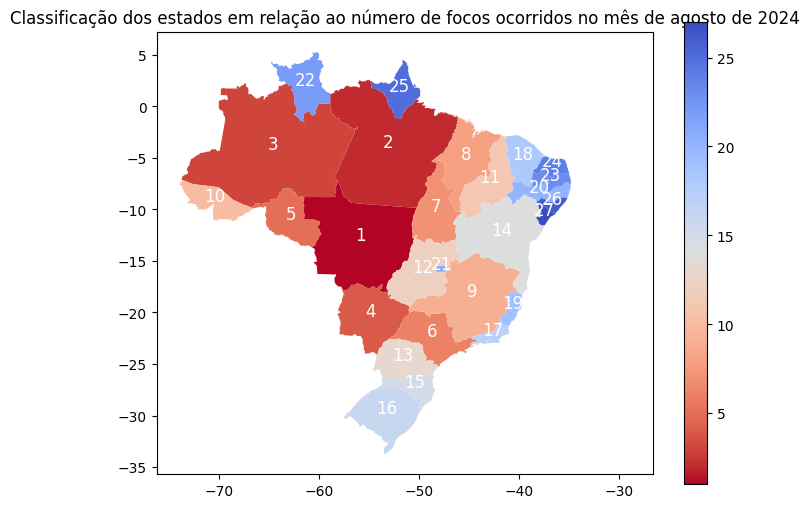

In [124]:
fig, ax = plt.subplots(figsize=(8, 6))
estados_focos.plot( column='ranking', 
                    cmap='coolwarm_r', # OU 'viridis', 'plasma', ...
                    ax=ax,
                    legend=True)
ax.set_title('Classificação dos estados em relação ao número de focos ocorridos no mês de agosto de 2024', fontsize=12)

# Se quisermos, podemos iterar cada feição (UF) e plotarmos o valor de "ranking" no centroide de cada feição
for idx, row in estados_focos.iterrows():
    ax.text(row.geometry.centroid.x, 
            row.geometry.centroid.y, 
            str(row['ranking']), 
            fontsize=12, 
            ha='center', 
            color='white')
# Plot
plt.show()